<a href="https://colab.research.google.com/github/kmanish7/deeplearning/blob/main/mob_wt_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from  pathlib import Path

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [9]:
pathToFolder = "/gdrive/MyDrive/deeplearning"

In [10]:
path = Path(pathToFolder) / "mobile_price.csv"

In [11]:
mobile_price = pd.read_csv(path)
mobile_price.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [12]:
# To Get target and predictors:
y = mobile_price.pop("mobile_wt")
X = mobile_price

In [13]:
model = tf.keras.Sequential()

In [14]:
model.add(layers.Input( shape = (20,) ) )

In [15]:
model.add(layers.Dense(900, activation='sigmoid'))

In [16]:
model.add(layers.Dense(700, activation='relu'))

In [18]:
model.compile( loss = "mae")

In [19]:
model.fit(X,y, epochs = 500 )

Epoch 1/500
63/63 [==============================] - 2s 19ms/step - loss: 37.4161
Epoch 2/500
63/63 [==============================] - 1s 20ms/step - loss: 31.3179
Epoch 3/500
63/63 [==============================] - 1s 19ms/step - loss: 31.2259
Epoch 4/500
63/63 [==============================] - 2s 27ms/step - loss: 31.1424
Epoch 5/500
63/63 [==============================] - 1s 12ms/step - loss: 31.3866
Epoch 6/500
63/63 [==============================] - 1s 12ms/step - loss: 31.1949
Epoch 7/500
63/63 [==============================] - 1s 13ms/step - loss: 31.1916
Epoch 8/500
63/63 [==============================] - 1s 12ms/step - loss: 30.8884
Epoch 9/500
63/63 [==============================] - 1s 12ms/step - loss: 31.0490
Epoch 10/500
63/63 [==============================] - 1s 12ms/step - loss: 31.0521
Epoch 11/500
63/63 [==============================] - 1s 12ms/step - loss: 31.2209
Epoch 12/500
63/63 [==============================] - 1s 13ms/step - loss: 31.0560
Epoch 13/500


In [20]:
pred = model.predict(X)

63/63 [==============================] - 0s 3ms/step


In [21]:
pred = np.round(pred)

In [22]:
y.shape

(2000,)

In [23]:
np.sum(pred == y.values.reshape(2000,1))/2000

0.0075

In [24]:
from tensorflow.keras.utils import plot_model

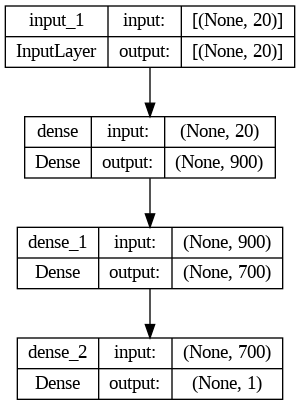

In [25]:
plot_model(model, show_shapes=True)